In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [2]:
A = np.random.normal(0,1,[9,9])
A = A@A.transpose()
X = funcs.sqrthm(A,1e-10)
assert (np.linalg.norm(X@X.transpose().conj()-A))<1e-5

In [3]:
A = np.random.random([3,3,3])
A = A+np.transpose(A,[1,0,2])
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A])

In [18]:
trans = MPS.transfer_matrix(0)
isinstance(trans,linalg.LinearOperator)
isinstance(trans,np.ndarray)

True

In [4]:
trans = MPS.transfer_matrix(0)
vr = np.eye(3)

gs = trans.dot(vr.reshape([9,]))

assert np.linalg.norm( gs - vr.reshape([9,])*gs[0])<1e-10
    

            

Test on Toric code

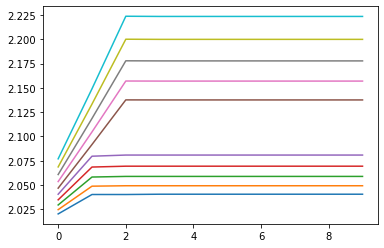

In [16]:
for h in np.arange(0.1,0.2,0.01):
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])

    B = np.zeros([1,1,4])
    B[0,0] =np.eye(2).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,50)
    MPS_power.update(0,10)
    pyplot.plot(MPS_power.E_history)
#B[1,1] = np.random.random([2,2]).reshape([4,])


In [10]:
eigs=[]

for h in np.arange(0.,0.3,0.01):   
    
    B = np.zeros([1,1,4])
    B[0,0] =np.array([[np.exp(h),0],[0,np.exp(-h)]]).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])

        
     
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
    MPS_power.update(0,200)

    eigs.append(MPS_power.E_history[-1])

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


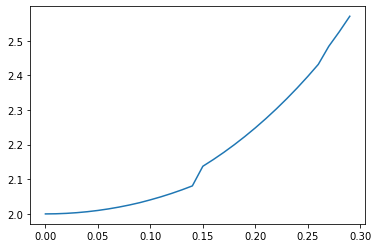

In [11]:
pyplot.plot(np.arange(0.,0.3,0.01),eigs)

In [ ]:
np.real(eigs)

array([2.        , 2.00039999, 2.00159989, 2.0036027 , 2.00640851,
       2.01002073, 2.01448253, 2.01975319, 2.02586193, 2.04893129,
       2.06050575, 2.07334305, 2.08745573, 2.10285967, 2.11957171,
       2.13761088, 2.15699826, 2.17775724, 2.19991386, 2.22593337,
       2.25169825, 2.27913501, 2.31468827, 2.34715809, 2.38176024,
       2.41877827, 2.45829881, 2.50051398, 2.54565125, 2.5939568 ])